# Logistics

## Load Data from drive 

In [0]:
!google-drive-ocamlfuse -cc

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
/bin/bash: google-drive-ocamlfuse: command not found


In [0]:
drive.mount("/gdrive", force_remount=True)

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


## Import Libraries

In [0]:
import pandas as pd 
import os
import numpy as np
import string
import matplotlib.pyplot as plt
import datetime
import matplotlib.style as style
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
from sklearn import tree
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn.tree.export import export_text
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
# !pip install -q pydot
from sklearn.datasets import load_iris
from sklearn import tree
import graphviz 
from matplotlib.pyplot import figure

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## Read Data

In [0]:
cd /gdrive/My Drive/EUNSUK

/gdrive/My Drive/EUNSUK


In [0]:
data=pd.read_csv('train_modified.csv',delimiter=',')

## Mapping Analog and Boolean  Inputs Outputs 

In [0]:
# split dataframe between analog and digital
valves=[]
pumps=[]
analog=[]
for cols in data.columns[1:-1]:
#   print(cols)
  if cols.startswith('MV'):
    valves.append(cols)
#     print("found a VALVE","-"*10)
  elif cols.startswith('P'):
    if not cols.startswith('PIT'):
      pumps.append(cols)
  else:
    analog.append(cols)
np.transpose(pumps)

array(['P101', 'P102', 'P201', 'P202', 'P203', 'P204', 'P205', 'P206',
       'P301', 'P302', 'P401', 'P402', 'P403', 'P404', 'P501', 'P502',
       'P601', 'P602', 'P603'], dtype='<U4')

In [0]:
print( 'Valves:',valves,'\n','Pumps: ',pumps,'\n','Analog: ',analog)


Valves: ['MV101', 'MV201', 'MV301', 'MV302', 'MV303', 'MV304'] 
 Pumps:  ['P101', 'P102', 'P201', 'P202', 'P203', 'P204', 'P205', 'P206', 'P301', 'P302', 'P401', 'P402', 'P403', 'P404', 'P501', 'P502', 'P601', 'P602', 'P603'] 
 Analog:  ['FIT101', 'LIT101', 'AIT201', 'AIT202', 'AIT203', 'FIT201', 'DPIT301', 'FIT301', 'LIT301', 'AIT401', 'AIT402', 'FIT401', 'LIT401', 'UV401', 'AIT501', 'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'FIT601']


# Phi Coeficicient

In [0]:
from sklearn.metrics import matthews_corrcoef
binary_signals=['MV101', 'MV201', 'MV301', 'MV302', 'MV303', 'MV304',
 'P101', 'P102', 'P201', 'P202', 'P203', 'P204',
 'P205', 'P206', 'P301', 'P302', 'P401', 'P402', 
 'P403', 'P404', 'P501', 'P502', 'P601', 'P602',
 'P603','UV401'] 
total_binary=len(binary_signals)
matthews_matrix=[]
matthews_matrix.append(binary_signals)
for i in range(total_binary):
  x_pred=data[binary_signals[i]]
  new_arr=[]
  for j in range(total_binary):
    y_pred=data[binary_signals[j]]
    new_arr.append(matthews_corrcoef(x_pred, y_pred)) 
  matthews_matrix.append(new_arr)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


In [0]:
mat_matrix=np.array(matthews_matrix)


In [0]:
print(mat_matrix[0])

['MV101' 'MV201' 'MV301' 'MV302' 'MV303' 'MV304' 'P101' 'P102' 'P201'
 'P202' 'P203' 'P204' 'P205' 'P206' 'P301' 'P302' 'P401' 'P402' 'P403'
 'P404' 'P501' 'P502' 'P601' 'P602' 'P603' 'UV401']


In [0]:
print(mat_matrix[1])

['1.0' '0.2398733640736422' '0.0570306488309896' '-0.16563015641219045'
 '0.09569381024314394' '0.0011254435982124176' '0.23832318753639217' '0.0'
 '0.0' '0.0' '0.24652509844219975' '0.0' '0.18240098946930336' '0.0'
 '0.0391240530010807' '-0.1955749052294998' '0.0' '0.07030493310211017'
 '0.0' '0.0' '0.06995083573359556' '0.0' '0.0' '0.05384760066274658' '0.0'
 '0.0701720880762897']


In [0]:
import numpy
numpy.savetxt("mat_matrix", mat_matrix, delimiter=",")

# Plotting Graphs (Different Plots)

In [0]:
#DATA POINTS
data_points_1=12000  # Remove Initial Disturbance 
data_points_2=49600
data_range=data_points_2-data_points_1
xpoints = [i for i in range(data_range)]
#_____________SAMPLE_____________________#
sample_data=data[data_points_1:data_points_2]

In [0]:
def plot_graphs_discrete(num_plot,labels, data, fig_size=(15,15)):
  fig, ax = plt.subplots(num_plot,figsize= fig_size)

  for num, label in zip(range(num_plot),labels):
    color = 'tab:blue'
    ax[num].set_xlabel('time (s)')
    ax[num].set_ylabel(label, color=color)
    ax[num].plot(xpoints[:],data[label][:], color=color)
    ax[num].tick_params(axis='y', labelcolor=color)
  plt.show()

In [0]:
def plot_graphs_superimpose(labels, data , fig_size=(15,15)):
  num_plot=len(labels)
  colors = plt.cm.jet(np.linspace(0,1,num_plot))
  from matplotlib.pyplot import figure
  figure(num=None, figsize=fig_size, facecolor='w', edgecolor='k')
  for num, label in zip(range(len(labels)),labels):
    plt.plot(xpoints[:],data[label][:], color=colors[num])
  plt.show()

In [0]:
def plot_analog_bool(label, data , fig_size):
  fig, ax1 = plt.subplots(figsize=fig_size)
  t=[i for i in range(len(label[0]))]
  xpoints = [i for i in range(len(data[label]))]

  color = 'tab:red'
  ax1.set_xlabel('time (s)')
  ax1.set_ylabel(label[0], color=color)
  ax1.plot( xpoints[:],data[label[0]][:], color=color)
  ax1.tick_params(axis='y', labelcolor=color)
  ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

  color = 'tab:blue'
  ax2.set_ylabel(label[1], color=color)  # we already handled the x-label with ax1
  ax2.plot(xpoints[:],data[label[1]][:], color=color)
  ax2.tick_params(axis='y', labelcolor=color)

  fig.tight_layout()  # otherwise the right y-label is slightly clipped
  plt.show()

In [0]:
def plot_analog_bool_bool(labels, data , fig_size):
  fig, ax1 = plt.subplots(figsize=fig_size)
  t=[i for i in range(len(labels[0]))]
  xpoints = [i for i in range(len(data[labels]))]

  color = 'tab:red'
  ax1.set_xlabel('time (s)')
  ax1.set_ylabel(labels[0], color=color)
  ax1.plot( xpoints[:],data[labels[0]][:], color=color)
  ax1.tick_params(axis='y', labelcolor=color)
  ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

  color = 'tab:blue'
  ax2.set_ylabel(labels[1], color=color)  # we already handled the x-labels with ax1
  ax2.plot(xpoints[:],data[labels[1]][:], color=color)
  ax2.tick_params(axis='y', labelcolor=color)
  ax3 = ax2.twinx()

  color = 'tab:green'
  ax3.set_ylabel(labels[2], color=color)  # we already handled the x-labels with ax1
  ax3.plot(xpoints[:],data[labels[2]][:], color=color)
  ax3.tick_params(axis='y', labelcolor=color)

  fig.tight_layout()  # otherwise the right y-label is slightly clipped
  plt.show()

In [0]:
def normal_plot(x,data, fig_size):
  from matplotlib.pyplot import figure
  figure(num=None, figsize=fig_size, facecolor='w', edgecolor='k')
  new_xpoints=[i for i in range(len(data[x]))]
  plt.plot(new_xpoints,data[x])  

In [0]:
type(sample_data['MV101'])

pandas.core.series.Series

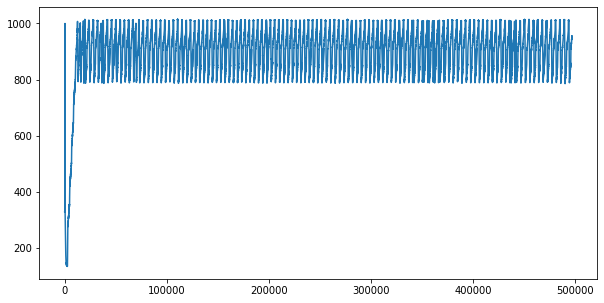

In [0]:
normal_plot('LIT301',data,(10,5))

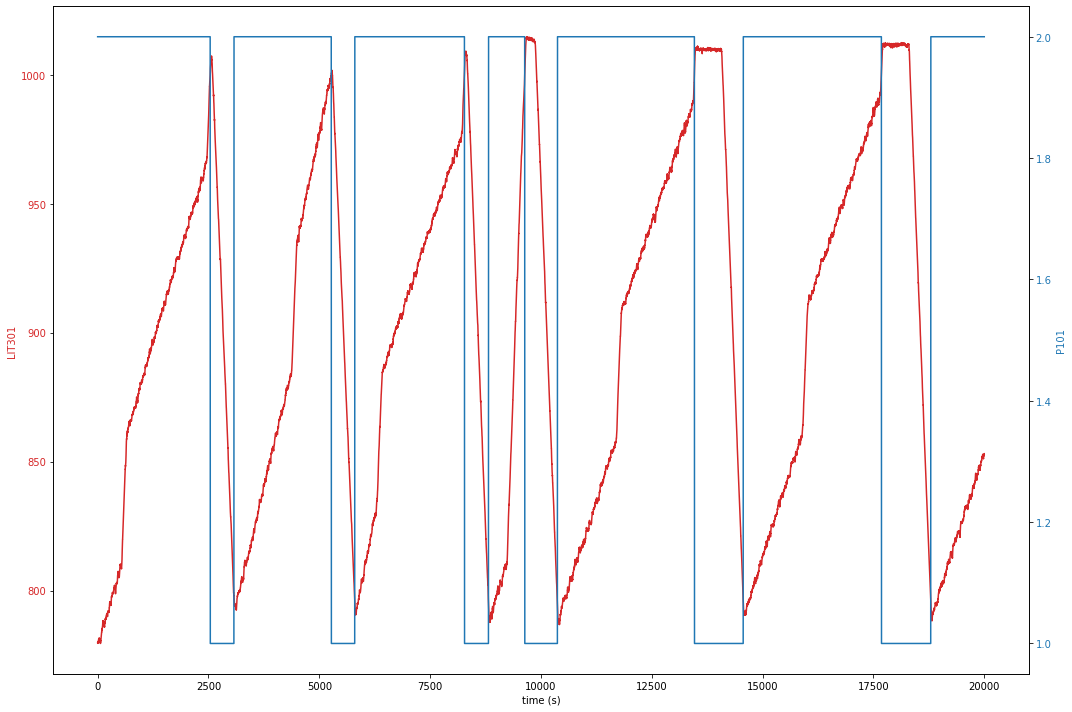

In [0]:
plot_analog_bool(['LIT301','P101'],data[10000:30000], (15,10))
# on,off=num_transitions(data['FIT01'])
# print(on,off)

In [0]:
print(on,off)

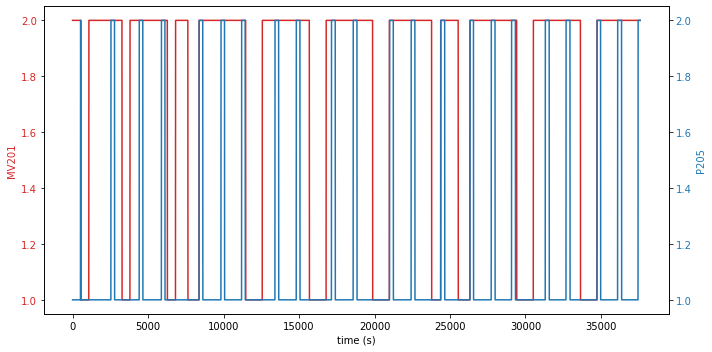

In [0]:
plot_analog_bool(['MV201','P205'], sample_data[:], (10,5))

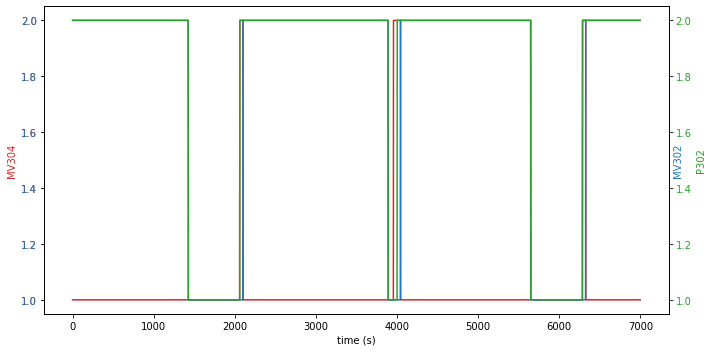

In [0]:
plot_analog_bool_bool(['MV304','MV302','P302'], sample_data[10000:17000], (10,5))

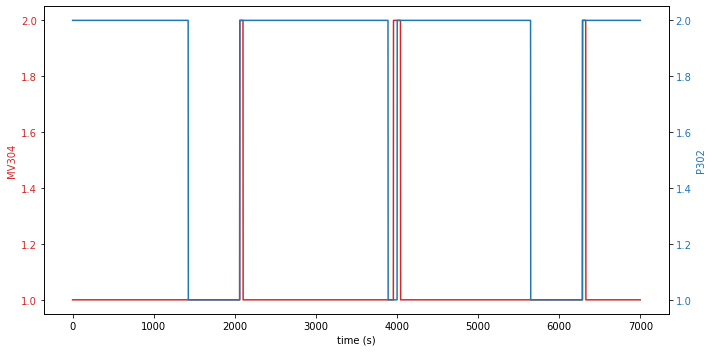

In [0]:
plot_analog_bool(['MV304','P302'], sample_data[10000:17000], (10,5))


# Transitions

##  Analog vs Boolean


In [0]:
#Global_Parameters
h_tolerance=0.04   # 0.5% tolerance
h_min_range=2
h_hard_tolerance=10
h_window=10

In [0]:
def num_transitions(bool_feature):
  cur_state=0
  
  # unique_items=bool_feature.unique()
  # uilist=unique_items.tolist()

  # unique_Off_tran=[]
  # unique_On_tran=[]
  num_off_transition=0
  num_on_transition=0
  for i in range(len(bool_feature)):
    cur_state=bool_feature[i]
    if i>1:
      prev_state=bool_feature[i-1]
      if prev_state==2 and cur_state ==1 :
        # OFF Transition from 2 -> 1
        num_off_transition+=1
      if prev_state==1 and cur_state ==2 :
        # ON Transition from 1 -> 2
        num_on_transition+=1 
  return num_on_transition,num_off_transition

In [0]:
def transition(bool_data,analog_datum):
  cur_state=0
  
  unique_items=bool_data.unique()
  uilist=unique_items.tolist()

  unique_Off_tran=[]
  unique_On_tran=[]

  for i in range(len(bool_data)):
    cur_state=bool_data[i]
    if i>1:
      prev_state=bool_data[i-1]
      if prev_state==2 and cur_state ==1 :
        # OFF Transition from 2 -> 1
        unique_Off_tran.append(analog_datum[i])
      
      if prev_state==1 and cur_state ==2 :
        # ON Transition from 1 -> 2
        unique_On_tran.append(analog_datum[i])

  return unique_Off_tran  , unique_On_tran

In [0]:
unique_Off_tran  , unique_On_tran=transition(data['P101'],data['LIT101'])


In [0]:
print(unique_On_tran)

[250.0793, 626.631, 813.2386, 778.1467, 813.3956, 813.7489, 812.9639, 813.7882, 810.1769, 812.7676, 811.8648, 814.22, 814.2985, 811.6685, 811.1975, 814.8088, 813.1209, 752.3969, 813.9452, 814.534, 813.1994, 812.3751, 811.0012, 810.7657, 812.4143, 813.0031, 813.0031, 811.8256, 812.7283, 813.3171, 812.2573, 812.3358, 814.5732, 813.0424, 813.1209, 813.0031, 812.1396, 812.4536, 811.8648, 812.5321, 813.9844, 811.6293, 812.6498, 812.061, 812.3751, 810.3732, 813.2386, 811.3937, 811.9825, 812.6498, 811.3545, 812.0218, 813.0031, 811.9433, 811.1583, 811.433, 812.6106, 811.9433, 812.7283, 814.22, 811.3937, 811.8256, 812.6106, 810.8835, 812.7283, 810.6872, 811.9433, 813.0424, 813.5134, 812.3358, 812.5321, 812.4536, 812.4536, 813.3956, 813.4349, 812.9246, 812.3358, 811.8648, 812.9246, 814.0237, 811.2368, 812.8069, 806.8405, 810.962, 810.8835, 807.4685, 813.1209, 808.9993, 813.3956, 804.7208, 813.7882, 808.4105, 810.8835, 814.377, 813.1994, 813.7882, 813.3171, 814.3377, 815.5153, 813.4349, 812.061, 

In [0]:
print(unique_Off_tran)

[264.5243, 366.7778, 652.9696, 516.6055, 793.1412, 524.8486, 524.8879, 525.8692, 522.2579, 496.2334, 529.5197, 534.8188, 534.4656, 531.9534, 529.9515, 530.344, 534.7403, 516.998, 790.6289999999999, 536.3104, 532.6599, 533.9553, 533.3272, 534.073, 537.0169999999999, 536.0356, 533.3272, 542.1591, 534.8581, 540.589, 538.2338, 537.6843, 532.6992, 527.0861, 528.2636, 530.3047, 529.2057, 532.9739, 529.9907, 526.6935, 529.1664, 524.4169, 528.3421, 528.7739, 527.7926, 531.3253, 528.4207, 525.6337, 525.2019, 522.8467, 527.2823, 527.7534, 530.9328, 536.0356, 525.0449, 524.3383, 527.5571, 523.6709999999999, 529.7945, 531.7178, 526.4973, 527.3608, 532.3459, 536.1142, 532.3066, 531.7571, 536.4282, 530.3047, 532.7384, 531.0898, 528.4207, 530.8151, 527.6748, 532.1497, 530.1085, 531.7964, 534.1123, 534.3085, 532.1497, 530.3832, 532.9347, 540.589, 531.7964, 495.4091, 533.5627, 545.4171, 493.7212, 535.4076, 492.1118, 536.6637, 493.1717, 533.445, 498.9026, 534.6618, 529.559, 532.5422, 533.1702, 536.3889,

In [0]:
def check_on_off_dis_similarity(on_data_points,off_data_points):
  
  count=0
  h_hard_tolerance=(np.mean(on_data_points)+np.mean(off_data_points))/2
  for on_datum,off_datum in zip(on_data_points,off_data_points):
    if abs(off_datum - on_datum) < h_hard_tolerance:
      count+=1
  per_count=(count/len(on_data_points))*100

  if per_count>90:
    return False
  else:
    return True

In [0]:
check_on_off_dis_similarity(unique_Off_tran  , unique_On_tran)

False

In [0]:
def percent_inrange(data_points,tolerance):
  max_data=max(data_points)
  # print(max_data)
  
  min_data=min(data_points)
  # print(min_data)
  total_data_points=len(data_points)
  count=0
  for i in range(len(data_points)): 
    datum_c=data_points[i]
    if i >1:
      datum_p=data_points[i-1]
      if abs(datum_p-datum_c) <= tolerance:
        
        count+=1
  return (count/total_data_points)*100

In [0]:
def acceptable_range(data_points,tolerance):
  max_data=max(data_points)
  min_data=min(data_points)
  if max_data -min_data > tolerance:
    return False
  else:
    return True

In [0]:
print(percent_inrange(on_range[1:],8))

NameError: ignored

In [0]:
off_range,on_range=transition(data['MV101'],data['LIT101'])

In [0]:
off_range[1:10],on_range[1:100]

([800.9918,
  801.2665,
  800.717,
  800.6777,
  800.4815,
  800.5992,
  801.2665,
  800.9133,
  800.7955],
 [493.3287,
  494.5847,
  495.2128,
  494.4277,
  493.4857,
  493.1324,
  493.5642,
  494.31,
  495.3698,
  495.25199999999995,
  495.6838,
  496.0764,
  494.467,
  493.1324,
  495.6838,
  496.1548,
  495.6053,
  494.153,
  497.8427,
  496.2334,
  495.8801,
  495.4483,
  497.9998,
  495.9586,
  495.8016,
  494.5847,
  495.8801,
  494.2707,
  494.467,
  494.9773,
  495.095,
  492.1511,
  493.7212,
  494.153,
  496.8614,
  495.4876,
  492.5044,
  496.1941,
  493.0539,
  494.8595,
  493.8782,
  496.0764,
  494.0745,
  493.839,
  496.3511,
  490.895,
  497.5287,
  497.1754,
  496.8614,
  496.6259,
  492.8576,
  496.4689,
  493.7604,
  493.6427,
  497.5287,
  493.6427,
  495.6446,
  493.8782,
  495.9586,
  495.5661,
  494.1137,
  497.725,
  495.095,
  495.8409,
  494.153,
  494.8595,
  494.3885,
  494.8595,
  494.1137,
  494.153,
  493.5642,
  498.51,
  492.5829,
  494.2315,
  494.270

In [0]:
def cal_tolerance(analog_datum):
  rng= analog_datum.max() - analog_datum.min()
  tolerance=rng*h_tolerance  
  return tolerance

In [0]:
def cal_range(analog_datum):
  return analog_datum.max() - analog_datum.min()

In [0]:
cal_range(data['FIT601'])

1.746131

In [0]:
cal_tolerance(data['LIT101'])

35.175052

In [0]:
def compare_transition_values(bool_data,analog_data):

  for analog_datum in analog_data:
    # print(data[analog_datum][:2])
    # print(data[bool_data].values)

    # if cal_range(data[analog_datum])>h_min_range:
    tolerance=cal_tolerance(data[analog_datum])
    Off_Crossover,On_Crossover=transition( data[bool_data], data[analog_datum])
    plt.figure()
    plt.plot([alph for alph in range(len(Off_Crossover[1:]))],Off_Crossover[1:])
    str_label='Off_Crossover'+str(analog_datum)
    plt.ylabel(str_label)
    plt.plot([alph for alph in range(len(On_Crossover[1:]))],On_Crossover[1:])
    str_label_o='ON_Crossover'+str(analog_datum)
    plt.ylabel(str_label_o)
    plt.show
    
          
    print( analog_datum," On CrossOver: ",np.mean(On_Crossover)," Percent_Similar_Crossover: ", percent_inrange(On_Crossover[1:],tolerance),"%")
    print( analog_datum," Off CrossOver: ",np.mean(Off_Crossover)," Percent_Similar_Crossover: ", percent_inrange(Off_Crossover[1:],tolerance),"%")

      # else:
      #   print(analog_datum, "Similar ON OFF Values")
    # else:
    #   print(analog_datum, "Range of value is Less than Tolerance")
    




LIT301  On CrossOver:  790.5376653225806  Percent_Similar_Crossover:  98.3739837398374 %
LIT301  Off CrossOver:  1000.2330741935482  Percent_Similar_Crossover:  98.3739837398374 %
LIT101  On CrossOver:  805.5147056451613  Percent_Similar_Crossover:  95.9349593495935 %
LIT101  Off CrossOver:  531.8045935483871  Percent_Similar_Crossover:  83.73983739837398 %
FIT201  On CrossOver:  0.0  Percent_Similar_Crossover:  98.3739837398374 %
FIT201  Off CrossOver:  2.4463587177419353  Percent_Similar_Crossover:  98.3739837398374 %


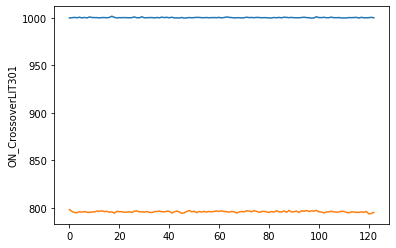

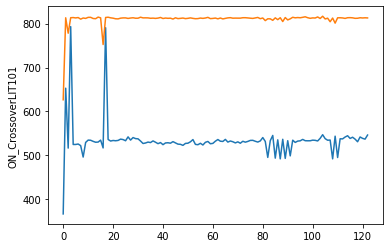

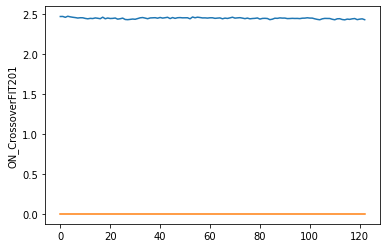

In [0]:
bool_data='P101'
analog_data=['LIT301','LIT101','FIT201']
compare_transition_values(bool_data,analog_data)

LIT401  On CrossOver:  838.4744570247934  Percent_Similar_Crossover:  0.8298755186721992 %
LIT401  Off CrossOver:  949.9640908713693  Percent_Similar_Crossover:  3.75 %


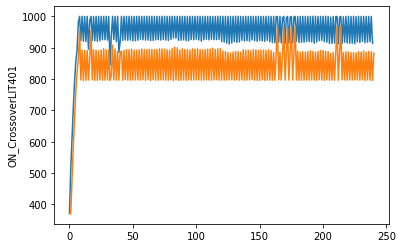

In [0]:
#IMPACT OF NOISE in finding the correct cross_over
bool_data='P302'
analog_data=['LIT401']
compare_transition_values(bool_data,analog_data)

AIT202  On CrossOver:  8.434291750000002  Percent_Similar_Crossover:  93.4959349593496 %
AIT202  Off CrossOver:  8.372650096774194  Percent_Similar_Crossover:  92.6829268292683 %


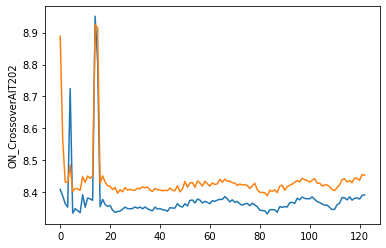

In [0]:
bool_data='P203'
analog_data=['AIT202']
compare_transition_values(bool_data,analog_data)

AIT203  On CrossOver:  354.43581095890414  Percent_Similar_Crossover:  91.0344827586207 %
AIT203  Off CrossOver:  374.14309315068493  Percent_Similar_Crossover:  94.48275862068965 %


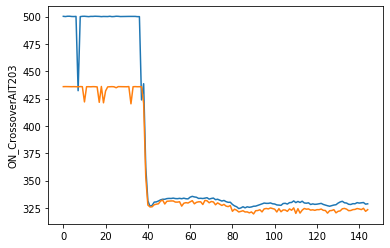

In [0]:
bool_data='P205'
analog_data=['AIT203']
compare_transition_values(bool_data,analog_data)

In [0]:
bool_data='MV101'
analog_data=['FIT101', 'LIT101', 'AIT201', 'AIT202', 'AIT203', 'FIT201', 'DPIT301', 'FIT301', 'LIT301', 
             'AIT401', 'AIT402', 'FIT401', 'LIT401', 'UV401', 'AIT501', 'AIT502', 'AIT503', 'AIT504', 
             'FIT501', 'FIT502', 'FIT503', 'FIT504', 'FIT601']


compare_transition_values(bool_data,analog_data)

FIT101 Similar ON OFF Values
LIT101 76.66666666666667
LIT101 100.0
AIT201 Similar ON OFF Values
AIT202 Range of value is Less than Tolerance
AIT203 0.8333333333333334
AIT203 0.8333333333333334
FIT201 Similar ON OFF Values
DPIT301 5.0
DPIT301 0.8333333333333334
FIT301 Similar ON OFF Values
LIT301 0.8333333333333334
LIT301 79.16666666666666
AIT401 Similar ON OFF Values
AIT402 Similar ON OFF Values
FIT401 Range of value is Less than Tolerance
LIT401 0.8333333333333334
LIT401 5.833333333333333
UV401 Range of value is Less than Tolerance
AIT501 Range of value is Less than Tolerance
AIT502 Similar ON OFF Values
AIT503 Similar ON OFF Values
AIT504 Similar ON OFF Values
FIT501 Range of value is Less than Tolerance
FIT502 Range of value is Less than Tolerance
FIT503 Range of value is Less than Tolerance
FIT504 Range of value is Less than Tolerance
FIT601 Range of value is Less than Tolerance


##  Boolean vs Boolean 

In [0]:
def bool_transition(bool_data):
  cur_state=0
  unique_items=bool_data.unique()
  uilist=unique_items.tolist()

  on_transition_array=[0]*len(bool_data)
  off_transition_array=[0]*len(bool_data)
  for i in range(len(bool_data)):
    cur_state=bool_data[i]
    if i>1:
      prev_state=bool_data[i-1]
      if prev_state==2 and cur_state ==1 :
        # OFF Transition from 2 -> 1
        off_transition_array[i]=1
        
      
      if prev_state==1 and cur_state ==2 :
        # ON Transition from 1 -> 2
        on_transition_array[i]=1
        

  return off_transition_array  , on_transition_array
  



In [0]:
off_transition_array  , on_transition_array=bool_transition(data['MV101'])

NameError: ignored

In [0]:
off_transition_array.count(1)  

NameError: ignored

In [0]:
def co_transition(bool_data_1,bool_data_2):

  off_transition_array_1  , on_transition_array_1 =bool_transition(data[bool_data_1])
  off_transition_array_2  , on_transition_array_2 =bool_transition(data[bool_data_2])
  
  count_off_array_1=off_transition_array_1.count(1)
  count_on_array_1 =on_transition_array_1.count(1)


  count_off_array_2 =off_transition_array_2.count(1)
  count_on_array_2 =on_transition_array_2.count(1)


  count_cotransition_on=0
  count_cotransition_off=0
  window=200
  for i in range(len(off_transition_array_1)):
    if off_transition_array_1[i] ==1:
      if i >window:
        for j in range(i-window, i+window):
          if off_transition_array_2[j] ==1:
            count_cotransition_off+=1
    
    elif on_transition_array_1[i] ==1:
      if i >window:
        for j in range(i-window, i+window):
          if on_transition_array_2[j] ==1:
            count_cotransition_on+=1


  return (count_cotransition_on/count_on_array_1)*100  , (count_cotransition_off/count_off_array_1)*100

In [0]:
per_on, per_off=co_transition('MV101','MV101')

NameError: ignored

In [0]:
print(per_on, per_off)

NameError: ignored

In [0]:
def co_transition_data(bool_data_1, data):
  for datum in data:
    per_on, per_off=co_transition(bool_data_1,datum)
    print(per_on, per_off)
    

      # print(datum, "high Co_transition")


In [0]:
bool_data='MV101'
bool_to_compare= ['MV201', 'MV301', 'MV302', 'MV303', 'MV304',
         'P101', 'P102', 'P201', 'P202', 'P203', 'P204', 'P205',
         'P206', 'P301', 'P302', 'P401', 'P402', 'P403', 'P404',
         'P501', 'P502', 'P601', 'P602', 'P603'] 

co_transition_data(bool_data,bool_to_compare)

0.8264462809917356 2.479338842975207
0.8264462809917356 0.8264462809917356
0.8264462809917356 2.479338842975207
0.8264462809917356 0.8264462809917356
1.6528925619834711 84.29752066115702
0.0 2.479338842975207
0.0 0.0
0.0 0.0
0.0 0.0
0.0 2.479338842975207


KeyboardInterrupt: ignored

In [0]:
bool_data='P101'
bool_to_compare= ['MV101','MV201', 'MV301', 'MV302', 'MV303', 'MV304',
         'P101', 'P102', 'P201', 'P202', 'P203', 'P204', 'P205',
         'P206', 'P301', 'P302', 'P401', 'P402', 'P403', 'P404',
         'P501', 'P502', 'P601', 'P602', 'P603'] 

co_transition_data(bool_data,bool_to_compare)

NameError: ignored

UF Transfer Pump (P-301/ P-302) Operation

a. Oneduty,onestandby
b. To interlock with RO Feed Tank level (LIT-401)

i. Low Setpoint: 800mm 􏰀 UF Pump (P-301/ P-302) ON

ii. High Setpoint: 1000mm 􏰀 UF Pump (P-301/ P-302) OFF

c. To interlock with UF Feed Tank Level (LIT-301)

i. Low Low Setpoint: 250mm 􏰀 Alarm & UF Pump (P-301/ P-302) OFF

d. TointerlockwithUFFeedFlowmeter(FIT-301)

i. Low Setpoint: 0.5m3/h 􏰀 Pump P-301/ P-302 STOP

In [0]:
bool_data='P101'
analog_data=[ 'LIT101', 'FIT301', 'LIT301']

#'FIT101', 'LIT101', 'AIT201', 'AIT202', 'AIT203', 'FIT201', 'DPIT301', 'FIT301', 'LIT301', 'AIT401', 'AIT402', 'FIT401',
compare_transition_values(bool_data,analog_data)

LIT101 93.4959349593496
LIT101 1.6260162601626018
FIT301 Similar ON OFF Values
LIT301 100.0
LIT301 100.0


In [0]:
def print_crossover_point(signals,data):
  bool_signal, analog_signal =data[signals]
  # 
  bool_signal=data[bool_signal].values
  analog_signal=data[analog_signal].values
  # print(bool_signal[:10],analog_signal[:10])
  cur_state=0
  # unique_items=bool_signal.unique()
  # uilist=unique_items.tolist()

  for i in range(len(bool_signal)):
    # print(bool_signal[i])
    cur_state=bool_signal[i]
    if i > 1:
      prev_state=bool_signal[i-1]
      if cur_state == 1 and prev_state==2: # Switch OFF_state
        print("OFF", analog_signal[i]  )

      if cur_state == 2 and prev_state==1: # Switch ON_state
        print("ON", analog_signal[i]  )




In [0]:
print_crossover_point(['P101','LIT301'], sample_data)

OFF 999.8638
ON 798.1527
OFF 1000.1039999999999
ON 796.15
OFF 1000.425
ON 795.0686
OFF 1000.064
ON 794.9484
OFF 1000.625
ON 795.8697
OFF 999.9039
ON 795.5092
OFF 1000.425
ON 796.11
OFF 999.9039
ON 795.3889999999999
OFF 1000.865
ON 795.1888
OFF 1000.3439999999999
ON 795.5893
OFF 1000.2239999999999
ON 795.7495


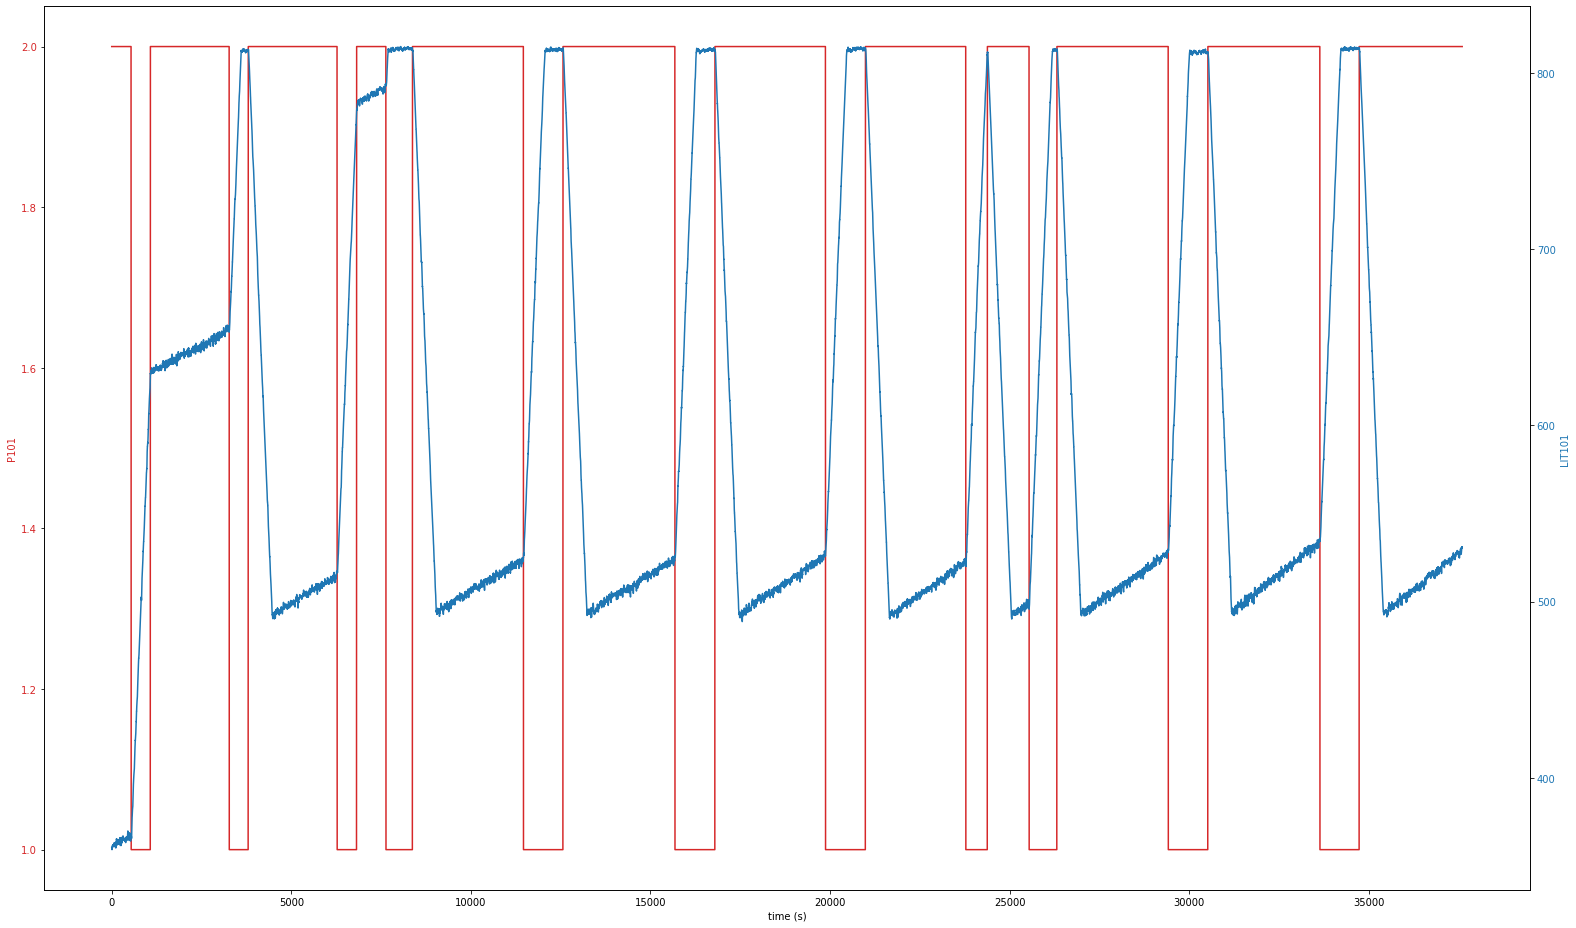

In [0]:
plot_analog_bool(['P101','LIT101'], sample_data, (22,13))

# Decision Trees


In [0]:
def unique_item_count(signals):
  for sig in signals:
    x=data[sig].unique()
    print(sig,": ",x)

In [0]:
unique_item_count(['MV101', 'MV201', 'MV301', 'MV302', 'MV303', 'MV304','P101', 'P102', 'P201', 'P202', 'P203', 'P204', 'P205', 'P206', 'P301', 'P302', 'P401', 'P402', 'P403', 'P404', 'P501', 'P502', 'P601', 'P602', 'P603'])

NameError: ignored

In [0]:
print_crossover_point(['MV101','LIT101'], data)

NameError: ignored

In [0]:
print_crossover_point(['P101','LIT101'], data)

In [0]:
P101_arr=[]
LIT101_arr=[]
i_value=[]
for i in range(len(data['P101'])):
  if data['LIT101'][i]<=250:
    i_value.append(i)

    P101_arr.append(data['P101'][i])
    LIT101_arr.append(data['LIT101'][i])


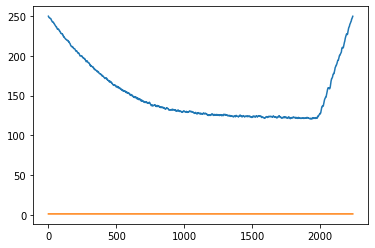

In [0]:
plt.plot([i for i in range(len(LIT101_arr))],LIT101_arr)
plt.plot([i for i in range(len(LIT101_arr))],P101_arr)

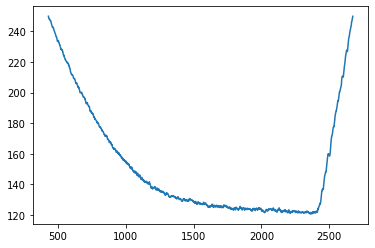

In [0]:
plt.plot(i_value,data['LIT101'][i_value])